CNN using finger component rotations and world location

In [1]:
# Seed value
seed_value = 1

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
seed_value += 1

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
seed_value += 1

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
seed_value += 1

# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical
from utils.parseData import GetData

In [3]:
fileNames = 'comp_rot_world_loc'
path = "./data/"
labels, data = GetData(path=path, augment=False, loc=True, w_space=True)

df = pd.DataFrame(data) # for visualising
df

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,-0.038792,-2.016457,1.548195,122.989521,5.031775,32.396511,0.254041,-2.744818,3.906211,154.947733,...,1.000470,-96.587422,-79.767570,-67.930081,1.115558,-5.913628,-0.568773,-70.781021,-70.997175,-87.361629
1,0.232234,-1.786558,1.794098,135.335277,22.762292,47.132208,-0.049160,-3.767692,3.268012,171.382518,...,17.626094,78.789987,5.173831,90.525847,4.690181,2.759705,14.530376,72.386893,-4.364089,104.625646
2,0.960879,-1.866656,1.434160,141.891296,28.615349,54.489470,1.780113,-3.887133,2.627067,-178.385441,...,16.152362,76.610167,22.542002,89.209393,6.549100,2.815749,13.717877,73.080910,-3.183434,110.232384
3,0.500170,-2.093755,1.352971,141.153613,28.042486,53.670653,0.796779,-4.303637,2.450669,-179.465062,...,16.933560,79.618323,-2.325866,93.411176,6.138421,0.651709,14.172652,73.203217,-12.320351,108.900585
4,-0.390707,-2.060587,1.437303,123.134389,5.315064,32.581669,-0.351397,-2.934589,3.763474,155.111402,...,0.768828,-94.026793,-73.783497,-70.421552,0.241170,-5.745536,-0.884762,-73.377815,-68.075547,-86.260239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,1.560408,-1.684768,1.091419,148.457278,32.934622,61.704457,3.245266,-3.291881,1.960292,-169.296869,...,3.862290,-86.168018,-21.924498,-69.311016,8.916274,1.854423,13.072296,73.211078,6.368497,110.566225
382,1.011716,-1.638853,1.659850,148.173342,32.774044,61.394765,2.147013,-3.321488,3.093845,-171.363101,...,4.529200,-89.995962,-56.594173,-71.078596,4.902442,-0.481437,4.034646,-75.804420,-53.043261,-76.332654
383,1.218250,-1.910551,1.153331,147.868398,32.599157,61.061963,2.568595,-3.773550,2.092638,-169.068472,...,4.322083,-86.434279,-28.165119,-72.721014,7.895126,-0.378020,13.804896,72.043068,9.470013,104.796324
384,0.979406,-1.904365,1.370644,150.887756,34.223492,64.348447,2.166683,-3.780167,2.487889,-168.145301,...,4.078692,-89.098956,-52.788756,-70.615061,5.226265,-1.397790,3.760512,-75.055462,-54.098864,-75.249048


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=2, stratify=labels)

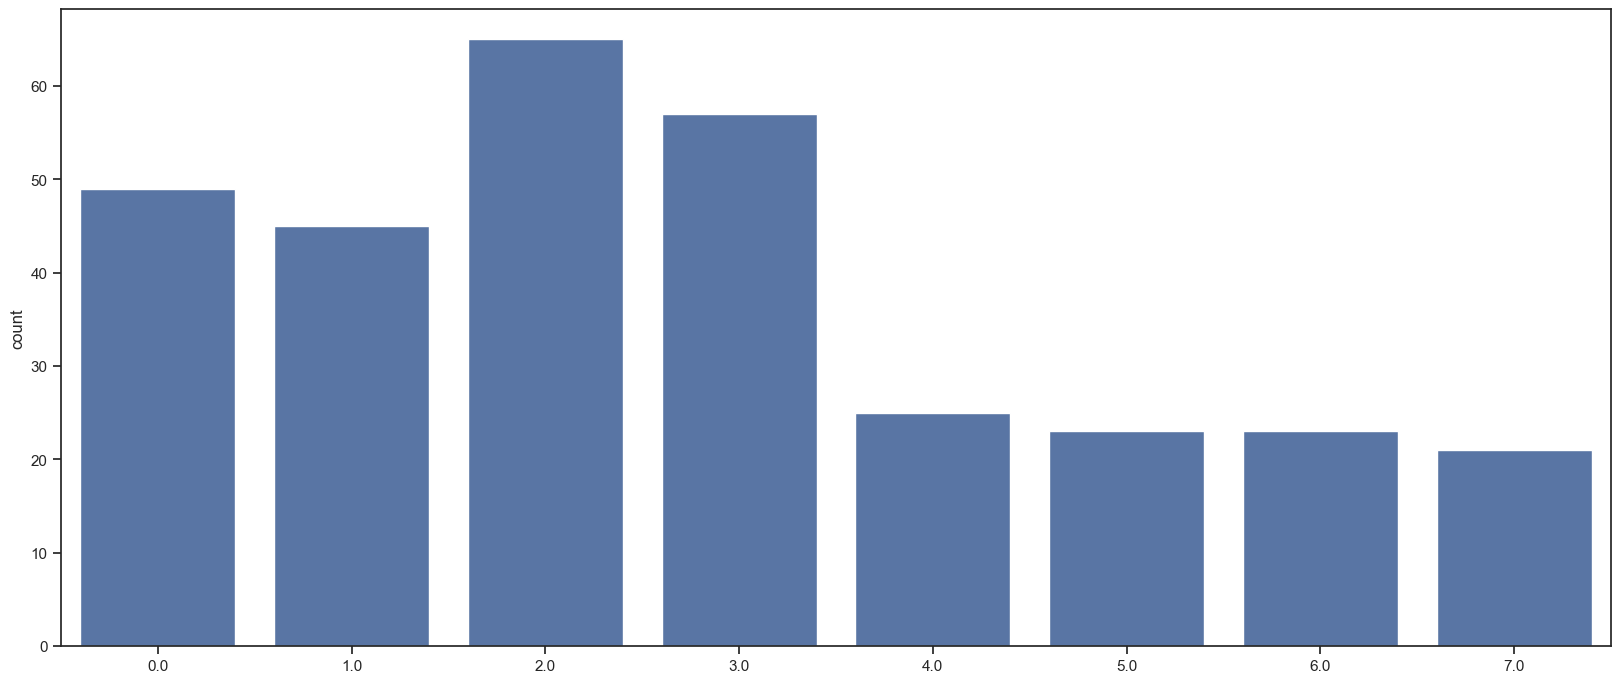

In [5]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set_style("ticks")
sns.color_palette("hls", 8)
cat = sns.countplot(x=y_train.reshape(-1))

In [6]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("")
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (308, 132)
y_train shape: (308, 1)

X_test shape: (78, 132)
y_test shape: (78, 1)


Changing labels shape to categorical: 

In [7]:
y_train[0]

array([1.])

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

y_train shape: (308, 8)
y_test shape: (78, 8)


In [11]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [12]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (308, 132, 1)
X_test shape: (78, 132, 1)


In [13]:
class_mapping = ['thumbs_up','thumbs_down','ok','victory', 'horns', 'phone', 'one', 'point']
num_classes = 8

#2. Creating and training CNN

In [14]:
import keras
from keras import layers  
from keras import models
from keras import callbacks
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [15]:
def create_1D_model():
  model = models.Sequential()

  model.add(layers.Conv1D(32, 3, input_shape=X_train.shape[1:3], activation='relu', ))
  model.add(layers.Conv1D(16, 1, activation='relu', ))
  model.add(layers.Dropout(0.2))
  model.add(layers.MaxPooling1D(pool_size=2))

  model.add(layers.Flatten())

  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(num_classes, activation='softmax'))

  return model

In [16]:
model = create_1D_model()
model.compile(optimizer=keras.optimizers.SGD(),loss='categorical_crossentropy',metrics=['accuracy', 'Precision', 'Recall'])

In [17]:
MCP = keras.callbacks.ModelCheckpoint('./results/' + 'model_' + fileNames + '.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [18]:
history = model.fit(X_train, y_train, batch_size=32,epochs=100, validation_data=(X_test, y_test),callbacks=[MCP,ES,RLP],verbose=1)

Epoch 1/100


 1/10 [==>...........................] - ETA: 4s - loss: 27.1446 - accuracy: 0.0312 - precision: 0.0312 - recall: 0.0312
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./results\model_comp_rot_world_loc.h5
10/10 [==============================] - 1s 22ms/step - loss: 14.4505 - accuracy: 0.3506 - precision: 0.3641 - recall: 0.2175 - val_loss: 0.8973 - val_accuracy: 0.5000 - val_precision: 1.0000 - val_recall: 0.3974 - lr: 0.0100
Epoch 2/100
 1/10 [==>...........................] - ETA: 0s - loss: 1.0778 - accuracy: 0.6250 - precision: 0.8667 - recall: 0.4062
Epoch 2: val_accuracy improved from 0.50000 to 0.88462, saving model to ./results\model_comp_rot_world_loc.h5
10/10 [==============================] - 0s 6ms/step - loss: 0.8319 - accuracy: 0.6883 - precision: 0.7857 - recall: 0.5714 - val_loss: 0.4249 - val_accuracy: 0.8846 - val_precision: 0.9683 - val_recall: 0.7821 - lr: 0.0100
Epoch 3/100
 1/10 [==>...........................] - ETA: 0s - los

d:\Repositories\python-workspaces\deep-learning-tests\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: val_accuracy improved from 0.97436 to 1.00000, saving model to ./results\model_comp_rot_world_loc.h5
10/10 [==============================] - 0s 5ms/step - loss: 0.3163 - accuracy: 0.8701 - precision: 0.8966 - recall: 0.8442 - val_loss: 0.0926 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - lr: 0.0100
Epoch 6/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.1912 - accuracy: 0.9062 - precision: 0.9062 - recall: 0.9062
Epoch 6: val_accuracy did not improve from 1.00000
10/10 [==============================] - 0s 4ms/step - loss: 0.2277 - accuracy: 0.9156 - precision: 0.9180 - recall: 0.9091 - val_loss: 0.1984 - val_accuracy: 0.9231 - val_precision: 0.9351 - val_recall: 0.9231 - lr: 0.0100
Epoch 7/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.2868 - accuracy: 0.8750 - precision: 0.8710 - recall: 0.8438
Epoch 7: val_accuracy did not improve from 1.00000
10/10 [==============================] - 0s 4ms/step - loss: 0.1680 - accur

#3. CNN evaluation

In [19]:
model.evaluate(X_test, y_test, verbose=2)

3/3 - 0s - loss: 0.0926 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - 16ms/epoch - 5ms/step


[0.09259553998708725, 1.0, 1.0, 1.0]

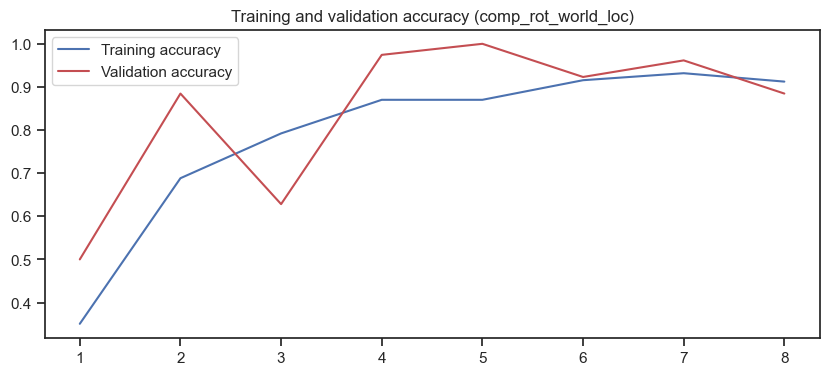

<Figure size 2000x827 with 0 Axes>

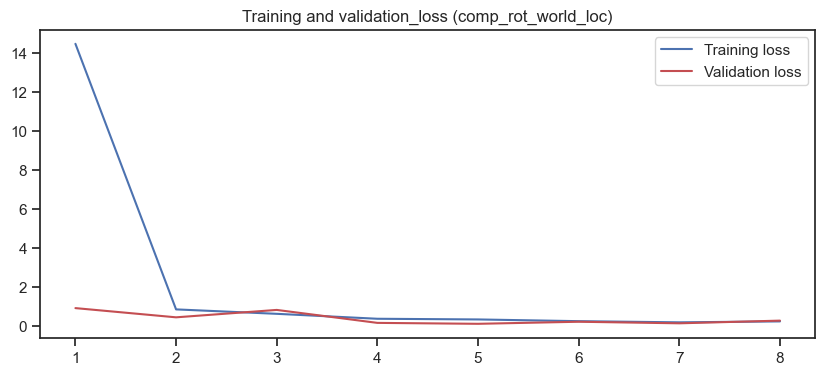

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 4))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy (' + fileNames + ')')
plt.legend() 
plt.savefig('./results/acc_' + fileNames + '.png',dpi=200)
plt.figure()

plt.figure(figsize=(10, 4))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation_loss (' + fileNames + ')')
plt.savefig('./results/loss_' + fileNames + '.png',dpi=200)
plt.legend()
plt.show()

In [21]:
predictions = np.argmax(model.predict(X_test), axis=1)
actual = np.argmax(y_test, axis=1)

3/3 [==============================] - 0s 1ms/step


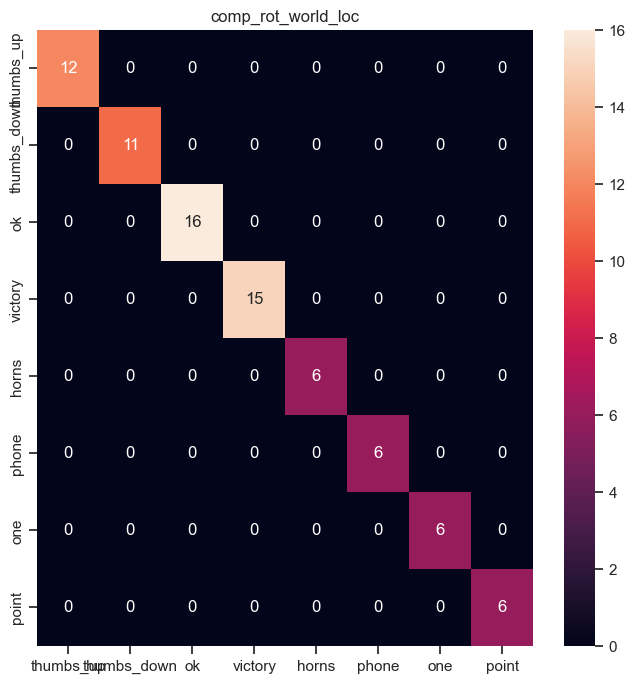

In [22]:
plt.figure(figsize=(8, 8))
cm = confusion_matrix(actual, predictions)
g = sns.heatmap(cm, annot=True, fmt='.0f')
g.set_xticklabels(class_mapping)
g.set_yticklabels(class_mapping)
plt.title(fileNames)
plt.savefig('./results/confusion_' + fileNames + '.png',dpi=200)
plt.show()

In [23]:
y_test_temp = np.argmax(y_test, axis=1)
print(classification_report(y_test_temp, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         6

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78

